## **หัวข้อ/คำถามที่สนใจ**
ใน Netflix มีหนัง (Movie) กับซีรีส์ (TV Show) อย่างไหนเยอะกว่ากัน?

ประเทศไหนสร้างหนัง/ซีรีส์ให้ Netflix มากที่สุด 10 อันดับแรก?

Rating ของคอนเทนต์ส่วนใหญ่เป็นแบบไหน? (เช่น เหมาะกับผู้ใหญ่, เหมาะกับเด็ก)

Netflix เริ่มเอาคอนเทนต์ลงเยอะๆ ตั้งแต่ปีไหน?

In [21]:
import pandas as pd      #  Data manipulation
import numpy as np       #  Numeric operations
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns    # Beautiful plots
import sklearn           # For ML

In [31]:
# --- Install Thai Font ---
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

# ตรวจสอบว่าไฟล์ถูกโหลดมาเรียบร้อย
import os
if os.path.exists('thsarabunnew-webfont.ttf'):
    print("Font downloaded successfully.")
else:
    print("Font download failed.")

# ย้ายฟอนต์ไปที่ที่ matplotlib รู้จัก
import matplotlib.font_manager as fm
fm.fontManager.addfont('thsarabunnew-webfont.ttf')

Font downloaded successfully.


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# ตั้งค่าฟอนต์เริ่มต้นสำหรับ Matplotlib
plt.rcParams['font.family'] = 'TH Sarabun New'
plt.rcParams['axes.unicode_minus'] = False # แก้ปัญหาสัญลักษณ์ติดลบ

print("Matplotlib is now set to use 'TH Sarabun New' font.")

Matplotlib is now set to use 'TH Sarabun New' font.


In [12]:
try:
  df = pd.read_csv('netflix_titles.csv')
  print("Data loaded successfully!")
  print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
except FileNotFoundError:
    print("Error: 'netflix_titles.csv' not found. Please make sure the file is in the correct directory.")

Data loaded successfully!
Dataset has 8807 rows and 12 columns.


In [14]:
print(df.columns)
print(df.head)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
<bound method NDFrame.head of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

             

In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [16]:
print(df.isnull().sum()) #check NULL

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [19]:
df['country'].fillna('Unknown', inplace=True)
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)

df.dropna(subset=['date_added', 'rating', 'duration'], inplace=True)
#ส่วนที่มีค่าว่างเยอะ ใช้ค่ากลางเป็น Unknown / ส่วนที่มีค่าว่างน้อย จะลบ row ทิ้ง
# ตรวจสอบผลลัพธ์อีกครั้ง
print("Missing values handled. Checking again:")
df.isnull().sum()

Missing values handled. Checking again:


,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


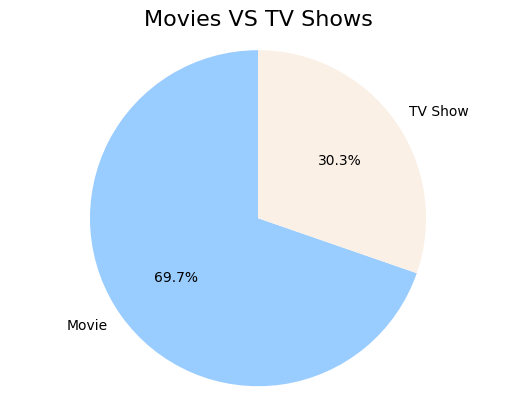

In [29]:
# --- Cell: Movie vs TV Show Pie Chart ---

# 1. นับจำนวนของแต่ละประเภท
type_counts = df['type'].value_counts()

# 2. สร้าง Pie Chart
plt.pie(type_counts,
        labels=type_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#99CCFF', '#FAF0E6'])

# 3. ตั้งชื่อกราฟ
plt.title('Movies VS TV Shows', fontsize=16)

# ทำให้วงกลมไม่เบี้ยว
plt.axis('equal')

# 4. แสดงผลกราฟ
plt.show()

สัดส่วนของ Movies มีมากกว่า TV Show อย่างเห็นได้ชัด
สื่อให้เห็นคอนเทนต์หลักของ Netflix นั่นคือ ภาพยนต์ มากกว่า TV Show หรือ Series

คำถามต่อยอด

-ผู้ผลิตหลักของสื่อทั้งสองประเภทเป็นประเทศเดียวกันหรือไม่?

-จำนวนสัดส่วนที่เห็นสอดคล้องกับการเลือกรับชมภาพยนต์หรือไม่?

-แต่หากกล่าวถึงสิ่งที่สร้าง Brand Identity ให้ Netflix อย่าง Original Series เช่น Stranger Things ซึ่งเป็นหมวด TV Show ที่มี season ต่อมาเรื่อยๆจนปัจจุบัน หรือมีการไป collapse กับวงการอื่นเช่น เป็นตัวละครในเกม ก็จะเกิดคำถามได้ว่า หรือ Netflix เน้นให้ความสำคัญกับ ปริมาณ หรือ คุณภาพ/ผลกระทบ มากกว่ากัน

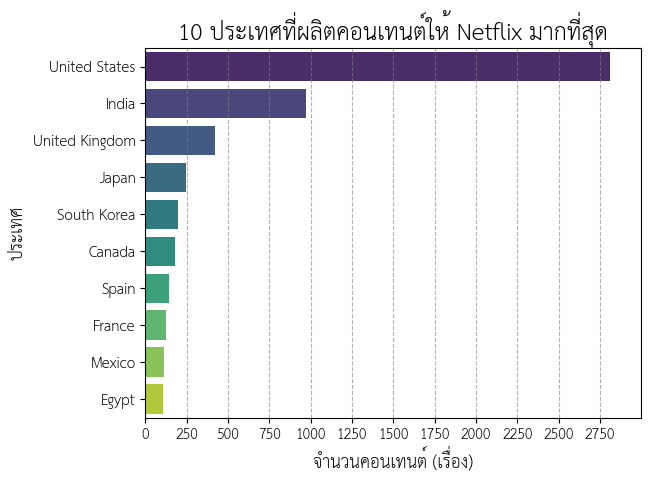

In [56]:
# --- Cell: Top 10 Content Producing Countries ---

# 1. นับจำนวนคอนเทนต์ของแต่ละประเทศ (และไม่นับประเทศที่เราเติมค่า 'Unknown' ไป)
top_countries = df[df['country'] != 'Unknown']['country'].value_counts().head(10)

# 2. สร้าง Bar Chart แนวนอน
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')

# 3. ตั้งชื่อกราฟและแกน
plt.title('10 ประเทศที่ผลิตคอนเทนต์ให้ Netflix มากที่สุด', fontsize=16)
plt.xlabel('จำนวนคอนเทนต์ (เรื่อง)', fontsize=12)
plt.ylabel('ประเทศ', fontsize=12)

min_x = 0
max_x = 3000
plt.xlim(min_x, max_x)
plt.xticks(np.arange(min_x, max_x, 250))

# 4. เพิ่มกริด
plt.grid(axis='x', linestyle='--', alpha=0.6, color='gray')

# 5. แสดงผลกราฟ
plt.show()

จากกราฟแสดงให้เห็นว่า ผู้ผลิตสื่อหลักยังเป็นสหรัฐอเมริกา ซึ่งทิ้งห่างจากอินเดียซึ่งเป็นที่สองไปหลายเท่า
สิ่งที่เห็น

-สะท้อนให้เห็นว่าผู้ใช้ Netflix ยังนิยมดูสื่อจากสหรัฐอเมริกา

-กลุ่มเป้าหมายหลักของ Netflix ยังเป็นผู้ชมในสหรัฐอเมริกา

คำถามต่อยอด
-หากต้องการขยายฐานผู้ชม/ผู้ใช้งาน หากเพิ่มคอนเทนต์/สื่อจากฝั่งเอเชีย จะสามารถขยายฐานลูกค้าได้หรือไม่

ดังนั้นเพื่อให้ชัดเจนยิ่งขึ้น เราจะหา ประเทศที่ผลิตสื่อมากที่สุดในปีล่าสุดที่ dataset มี

ปีล่าสุดในข้อมูลคือ: 2021


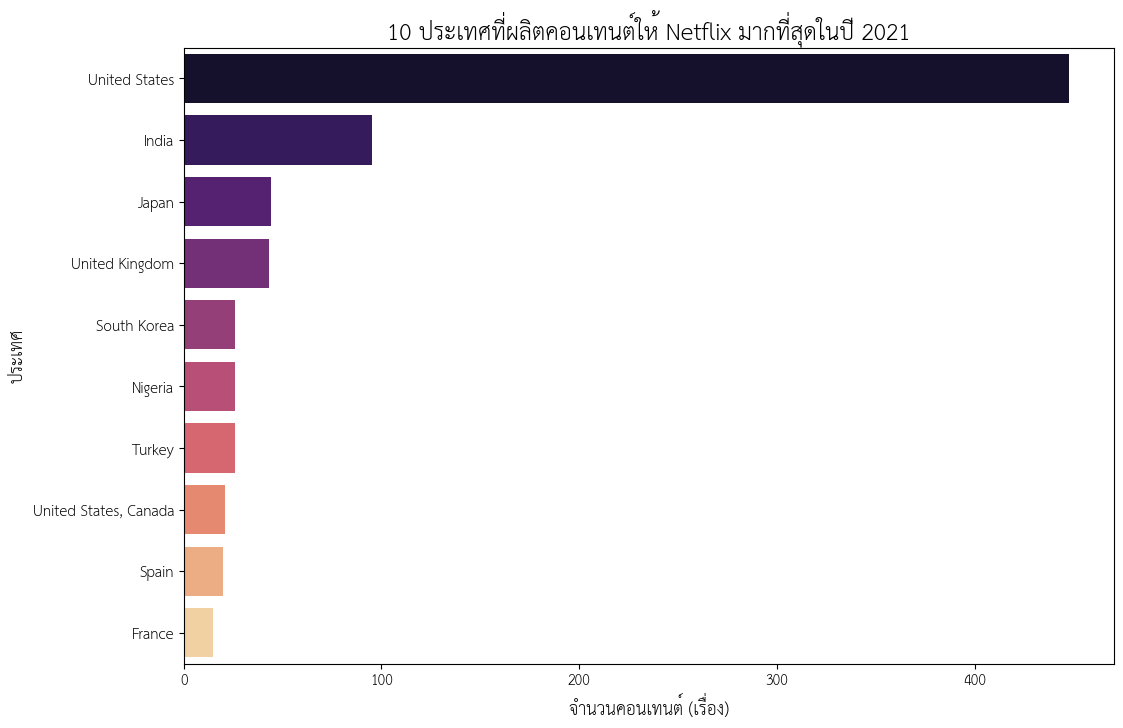

In [74]:
# --- Cell: Top Countries in the Most Recent Year ---

# 1. แปลงคอลัมน์ 'date_added' ให้เป็น datetime เพื่อให้ง่ายต่อการดึงข้อมูลปี
# errors='coerce' จะเปลี่ยนค่าที่แปลงไม่ได้ให้เป็นค่าว่าง (NaT)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# 2. สร้างคอลัมน์ใหม่ 'added_year' เพื่อเก็บข้อมูลปีที่คอนเทนต์ถูกเพิ่มเข้ามา
df['added_year'] = df['date_added'].dt.year

# 3. หาว่าปีล่าสุดในข้อมูลคือปีอะไร (และแปลงเป็นเลขจำนวนเต็ม)
latest_year = int(df['added_year'].max())

print(f"ปีล่าสุดในข้อมูลคือ: {latest_year}")

# 4. กรอง DataFrame ให้เหลือเฉพาะข้อมูลในปีล่าสุด
df_latest_year = df[df['added_year'] == latest_year]

# 5. นับจำนวนคอนเทนต์ของแต่ละประเทศในปีล่าสุด (ไม่นับ 'Unknown')
top_countries_latest = df_latest_year[df_latest_year['country'] != 'Unknown']['country'].value_counts().head(10)

# 6. สร้าง Bar Chart แนวนอน
plt.figure(figsize=(12, 8))
sns.barplot(x=top_countries_latest.values, y=top_countries_latest.index, palette='magma')

# 7. ตั้งชื่อกราฟและแกน (ใช้ f-string เพื่อใส่ค่าปีล่าสุดลงไปใน title)
plt.title(f'10 ประเทศที่ผลิตคอนเทนต์ให้ Netflix มากที่สุดในปี {latest_year}', fontsize=16)
plt.xlabel('จำนวนคอนเทนต์ (เรื่อง)', fontsize=12)
plt.ylabel('ประเทศ', fontsize=12)

# 8. แสดงผลกราฟ
plt.show()

เห็นได้ว่าใน ปี 2021 สหรัฐอเมริกา ยังคงเป็นผู้นำในการผลิตสื่อให้ netflix สะท้อนให้เห็นถึงความก้าวหน้าของอุตสาหกรรมนี้ในสหรัฐอเมริกา และ เห็นชัดได้ถึงประเทศผู้ผลิตหลักของ Netflix และสื่อที่ผู้ใช้งานนิยมบริโภค

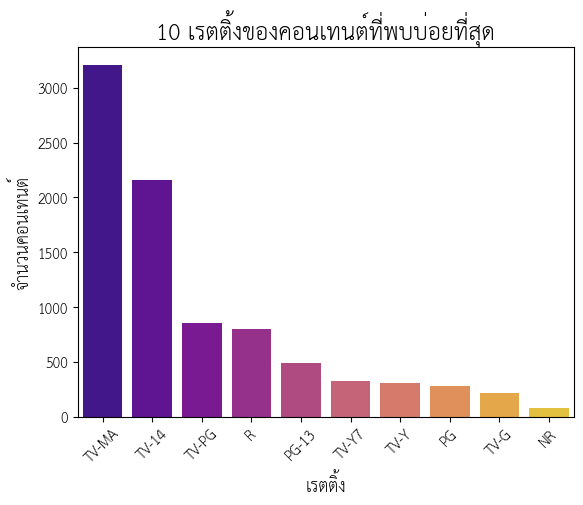

In [57]:
# --- Cell: Top 10 Content Ratings ---

# 1. นับจำนวนของแต่ละเรตติ้ง
top_ratings = df['rating'].value_counts().head(10)

# 2. สร้าง Bar Chart แนวตั้ง
sns.countplot(x='rating', data=df, order=top_ratings.index, palette='plasma')

# 3. ตั้งชื่อกราฟและแกน
plt.title('10 เรตติ้งของคอนเทนต์ที่พบบ่อยที่สุด', fontsize=16)
plt.xlabel('เรตติ้ง', fontsize=12)
plt.ylabel('จำนวนคอนเทนต์', fontsize=12)
plt.xticks(rotation=45)

# 4. แสดงผลกราฟ
plt.show()

จากกราฟนี้แสดงให้เห็นว่า กลุ่มเป้าหมายหลัก (Target Audience) ของ Netflix คือกลุ่มผู้ใหญ่และวัยรุ่นตอนปลาย

กลยุทธ์ของ Netflix จึงเน้นไปที่การสร้างและจัดหาคอนเทนต์ที่มีเนื้อหาเข้มข้นซับซ้อน ซึ่งตอบโจทย์ผู้ชมกลุ่มนี้ที่มีกำลังซื้อและเป็นผู้ตัดสินใจสมัครสมาชิก

แม้ว่า Netflix จะมีคอนเทนต์สำหรับครอบครัวและเด็ก แต่ก็ไม่ใช่หัวใจหลักของแพลตฟอร์มเมื่อเทียบกับคู่แข่งอย่าง Disney+

คำถามต่อยอด

-Netflix เสียโอกาสทำตลาดเกี่ยวกับแนวครอบครัวใช่หรือไม่?
-ข้อมูลที่เราเห็นสอดคล้องกันกับชั่วโมงการชมหรือไม่ คอนเทนต์เด็กและครอบครัวอาจมีน้อย แต่กลุ่มเป้าหมายนี้อาจนิยมดูซ้ำหลายรอบแทน

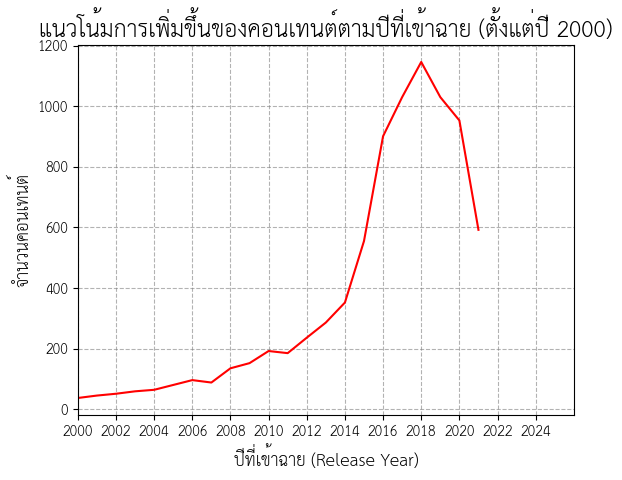

In [66]:
# --- Cell: Content Growth by Release Year ---

# 1. นับจำนวนคอนเทนต์ในแต่ละปี และเรียงตามปี (index)
content_by_year = df['release_year'].value_counts().sort_index()

# 2. เพื่อให้กราฟดูง่ายขึ้น เราจะแสดงข้อมูลตั้งแต่ปี 2000 เป็นต้นมา
content_after_2000 = content_by_year[content_by_year.index >= 2000]

# 3. สร้าง Line Chart
sns.lineplot(x=content_after_2000.index, y=content_after_2000.values, color='red')

# 4. ตั้งชื่อกราฟและแกน
plt.title('แนวโน้มการเพิ่มขึ้นของคอนเทนต์ตามปีที่เข้าฉาย (ตั้งแต่ปี 2000)', fontsize=16)
plt.xlabel('ปีที่เข้าฉาย (Release Year)', fontsize=12)
plt.ylabel('จำนวนคอนเทนต์', fontsize=12)

min_x = 2000
max_x = 2026
plt.xlim(min_x, max_x)
plt.xticks(np.arange(min_x, max_x, 2))

plt.grid(linestyle='--', alpha=0.6, color='gray')

# 5. แสดงผลกราฟ
plt.show()

เห็นได้ว่าจำนวนคอนเทนต์มีมากขึ้นเรื่อยๆ และถึงจุดยอดสุดในปี 2018 หลังจากนั้นมีแนวโน้มที่จะลดลงเรื่อยๆ

มองได้ว่า ช่วงที่กำลังก่อตั้ง สร้างฐานผู้ใช้งาน Netflix ต้องเร่งเพิ่มจำนวนคอนเทนต์ให้คนสนใจและรู้จัก
จากนั้นการที่จำนวนการนำสื่อเข้าน้อยลงจึงเป็นสิ่งที่ตามต่อมาหลักจากที่ได้ฐานลูกค้า/ผู้ใช้งานเรียบร้อยแล้ว คิดได้ว่าอาจจะนำเงินทุนมาเน้นสร้าง Original Movie/Series มากขึ้นหรือนำไปพัฒนาในส่วนอื่น

คิดได้อีกมุมหนึ่งคือคู่แข่งอย่าง Disnet plus ซึ่งมาเปิดตัวในปี 2019 ซึ่งก็ตรงตามไทม์ไลน์ที่ลดลงเรื่อยๆของจำนวนคอนเทนต์ที่นำเข้า Netflix เพราะอาจมีสื่อบางส่วนที่ถูกถอนออก และย้ายไปยัง Disney plus

คำถามต่อยอด
ในอนาคต Netflix จะใช้วิธีไหนในการทำให้ตนเองเป็นผู็นำในตลาดนี้ เนื่องจากการเพิ่มคอนเทนต์ดูไม่ใช่วิธีที่ Netflix จะทำหลังจากการวิเคราะห์ข้อมูลที่มี

หลังจากที่เราได้เห็นภาพรวมของคอนเทนต์บน Netflix ผ่านการวิเคราะห์เชิงสำรวจ (EDA) ใน 4 คำถามแรกไปแล้ว ในขั้นต่อไป เราจะลองใช้ Machine Learning เพื่อตอบคำถามที่ลึกลงไปอีกขั้น:

### **"เราสามารถจัดกลุ่มคอนเทนต์ที่มีลักษณะคล้ายคลึงกันโดยอัตโนมัติได้หรือไม่ และกลุ่มเหล่านั้นสะท้อนถึง 'ประเภทรายการ' ที่มีความหมายอย่างไรบ้าง?"**

เพื่อหาคำตอบนี้ เราจะใช้โมเดลการจัดกลุ่ม (Clustering Model) ที่ชื่อว่า K-Means เข้ามาวิเคราะห์ข้อมูลจาก 'ประเภท' (listed_in) และ 'คำอธิบายเรื่องย่อ' (description) เพื่อค้นหารูปแบบที่ซ่อนอยู่และแบ่งประเภทคอนเทนต์โดยอัตโนมัติ

In [67]:
# --- Cell 1: Import Libraries ---
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# ป้องกัน error ที่อาจเกิดขึ้นในอนาคต (optional)
import warnings
warnings.filterwarnings("ignore")

print("Libraries imported successfully!")

Libraries imported successfully!


In [68]:
# --- Cell 2: Load Data ---
# ให้แน่ใจว่าไฟล์ netflix_titles.csv อยู่ใน folder เดียวกันกับไฟล์ notebook ของคุณ
try:
    df = pd.read_csv('netflix_titles.csv')
    print("Data loaded successfully!")
    print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
except FileNotFoundError:
    print("Error: 'netflix_titles.csv' not found. Please make sure the file is in the correct directory.")

# แสดง 5 แถวแรกเพื่อดูหน้าตาข้อมูล
df.head()

Data loaded successfully!
Dataset has 8807 rows and 12 columns.


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [69]:
# --- Cell 3: Prepare Features ---

# จัดการกับข้อมูลที่หายไป (NaN) โดยแทนที่ด้วยข้อความว่างๆ
df['description'] = df['description'].fillna('')
df['listed_in'] = df['listed_in'].fillna('')

# สร้างคอลัมน์ใหม่ชื่อ 'features' โดยการนำข้อความจาก 2 คอลัมน์มารวมกัน
df['features'] = df['listed_in'] + ' ' + df['description']

# แสดงผลลัพธ์เพื่อตรวจสอบ
print("Created 'features' column.")
df[['title', 'features']].head()

Created 'features' column.


,title,features
0,Dick Johnson Is Dead,Documentaries As her father nears the end of h...
1,Blood & Water,"International TV Shows, TV Dramas, TV Mysterie..."
2,Ganglands,"Crime TV Shows, International TV Shows, TV Act..."
3,Jailbirds New Orleans,"Docuseries, Reality TV Feuds, flirtations and ..."
4,Kota Factory,"International TV Shows, Romantic TV Shows, TV ..."


In [70]:
# --- Cell 4: Vectorize Text Data ---

# 1. สร้าง object TfidfVectorizer
# - stop_words='english': ตัดคำทั่วไปในภาษาอังกฤษที่ไม่ค่อยมีความหมาย (เช่น a, an, the, is)
# - max_features=5000: เลือกใช้แค่ 5,000 คำที่สำคัญที่สุด เพื่อให้โมเดลไม่ทำงานหนักเกินไป
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# 2. สั่งให้ TF-IDF เรียนรู้และแปลงข้อมูล 'features' ของเรา
tfidf_matrix = tfidf.fit_transform(df['features'])

# แสดงขนาดของ matrix ที่ได้ (แถว = จำนวนหนัง, คอลัมน์ = จำนวนคำ)
print("TF-IDF matrix created successfully!")
print(f"Matrix shape: {tfidf_matrix.shape}")

TF-IDF matrix created successfully!
Matrix shape: (8807, 5000)


In [71]:
# --- Cell 5: Apply K-Means Clustering ---

# กำหนดจำนวนกลุ่มที่ต้องการ ในที่นี้เราลองเริ่มที่ 8 กลุ่ม
num_clusters = 8

# สร้างโมเดล K-Means
# - n_clusters: คือจำนวนกลุ่มที่เราระบุ
# - random_state=42: เพื่อให้ผลลัพธ์เหมือนเดิมทุกครั้งที่รันโค้ด
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# สั่งให้โมเดลเรียนรู้และจัดกลุ่มข้อมูลของเรา
kmeans.fit(tfidf_matrix)

# นำผลลัพธ์ (ป้ายกำกับกลุ่ม 0-7) ไปใส่ในคอลัมน์ใหม่ของ DataFrame
df['cluster'] = kmeans.labels_

# แสดงผลลัพธ์เพื่อตรวจสอบ
print("K-Means model trained and clusters assigned!")
df[['title', 'listed_in', 'cluster']].head()

K-Means model trained and clusters assigned!


,title,listed_in,cluster
0,Dick Johnson Is Dead,Documentaries,7
1,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries",0
2,Ganglands,"Crime TV Shows, International TV Shows, TV Act...",0
3,Jailbirds New Orleans,"Docuseries, Reality TV",6
4,Kota Factory,"International TV Shows, Romantic TV Shows, TV ...",0


In [75]:
# --- Cell 6: Analyze the Clusters ---

print("Analyzing the content of each cluster...")

# วนลูปเพื่อดูข้อมูลในแต่ละ cluster
for i in range(num_clusters):
    print(f"\n----------- Cluster {i} -----------")

    # ดึงข้อมูลเฉพาะของ cluster นั้นๆ
    cluster_df = df[df['cluster'] == i]

    # นับประเภทของคอนเทนต์ที่พบบ่อยที่สุดในกลุ่มนี้
    # .str.split(', '): แยกประเภทที่ติดกัน (เช่น 'Dramas, International Movies')
    # .explode(): ทำให้แต่ละประเภทอยู่ในแถวของตัวเอง
    # .value_counts(): นับจำนวน
    top_genres = cluster_df['listed_in'].str.split(', ').explode().value_counts()

    print(f"Number of items in this cluster: {len(cluster_df)}")
    print("Top 5 Genres:")
    print(top_genres.head(5))

    print("\nSample Titles:")
    print(cluster_df['title'].head().to_string(index=False))

Analyzing the content of each cluster...

----------- Cluster 0 -----------
Number of items in this cluster: 1262
Top 5 Genres:
listed_in
International TV Shows    1094
TV Dramas                  627
Crime TV Shows             367
Romantic TV Shows          363
TV Comedies                278
Name: count, dtype: int64

Sample Titles:
                      Blood & Water
                          Ganglands
                       Kota Factory
Vendetta: Truth, Lies and The Mafia
                   Bangkok Breaking

----------- Cluster 1 -----------
Number of items in this cluster: 940
Top 5 Genres:
listed_in
Kids' TV                  442
TV Comedies               257
Reality TV                152
Anime Series              142
International TV Shows    142
Name: count, dtype: int64

Sample Titles:
                Midnight Mass
The Great British Baking Show
            Dear White People
           Chicago Party Aunt
      Tayo and Little Wizards

----------- Cluster 2 -----------
Number of it

Cluster 0 : International Drama & Crime Series
ซีรีส์ต่างประเทศที่เน้นเนื้อหาเข้มข้น อาชญากรรม

Cluster 1 : Variety TV Shows & Series
เนื้อหาหลากหลาย เช่น เรียลลิตี้ , อนิเมชั่น , คอมเมดี้

Cluster 2 : Action & Adventure Movies
ภาพยนต์แอคชั่นผจญภัย เน้นความตื่นเต้น ฉากต่อสู้

Cluster 3 : Dramas & Independent Films
กลุ่มใหญ่ที่สุด เน้นหนังนอกกระแส เนื้อเรื่อง การแสดง

Cluster 4 : Stand-Up Comedy
กลุ่มเฉพาะ ของ Stand-Up Comedy

Cluster 5 : Children & Family Movies
การ์ตูนและภาพยนต์ที่ดูได้ทั้งครอบครัวและเด็ก

Cluster 6 : Docuseries
ซีรีส์สารคดีเฉพาะ เน้นเล่าเป็นตอนๆ

Cluster 7 : Documentary Films
ชีวประวัติ สารคดี ตอนเดียวจบ